In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [8]:
insurance_dataset=pd.read_csv("insurance.csv")

In [9]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,alcoholic,diabetic,region,charges
0,19,female,27.900,0,yes,no,yes,southwest,16884.92400
1,18,male,33.770,1,no,yes,yes,southeast,1725.55230
2,28,male,33.000,3,no,yes,yes,southeast,4449.46200
3,33,male,22.705,0,no,no,no,northwest,21984.47061
4,32,male,28.880,0,no,no,no,northwest,3866.85520


In [10]:
insurance_dataset.shape

(1338, 9)

In [11]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   object 
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   object 
 5   alcoholic  1338 non-null   object 
 6   diabetic   1338 non-null   object 
 7   region     1338 non-null   object 
 8   charges    1338 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


In [12]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 432x432 with 0 Axes>

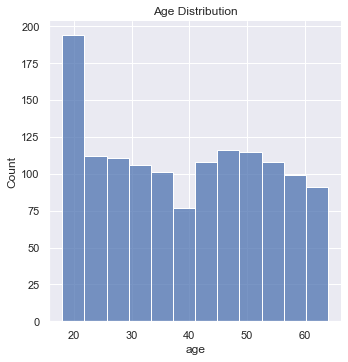

In [13]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['age'])
plt.title("Age Distribution")
plt.show()

In [14]:
insurance_dataset['age'].mean()

39.20702541106129

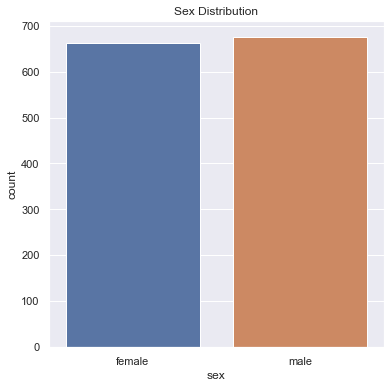

In [15]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [16]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 432x432 with 0 Axes>

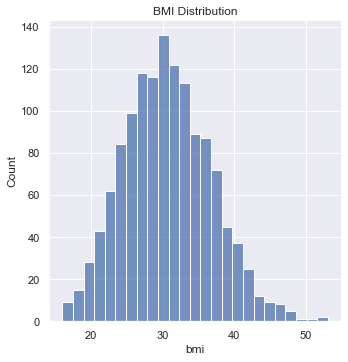

In [17]:
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title("BMI Distribution")
plt.show()

Normal BMI Range:18.5 to 24.9

<Figure size 432x432 with 0 Axes>

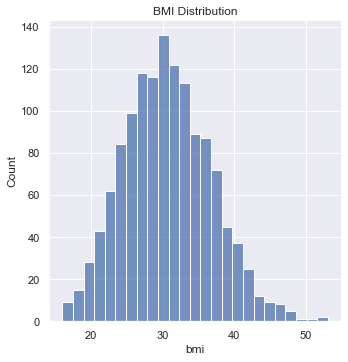

In [18]:
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['bmi'])
plt.title("BMI Distribution")
plt.show()

In [19]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<Figure size 432x432 with 0 Axes>

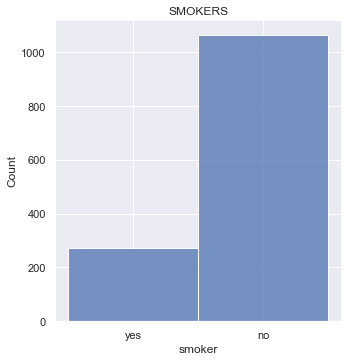

In [20]:
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['smoker'])
plt.title("SMOKERS")
plt.show()

In [21]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<Figure size 432x432 with 0 Axes>

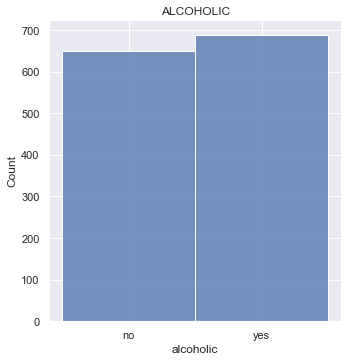

In [22]:
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['alcoholic'])
plt.title("ALCOHOLIC")
plt.show()

In [23]:
insurance_dataset['alcoholic'].value_counts()

yes    688
no     650
Name: alcoholic, dtype: int64

<Figure size 432x432 with 0 Axes>

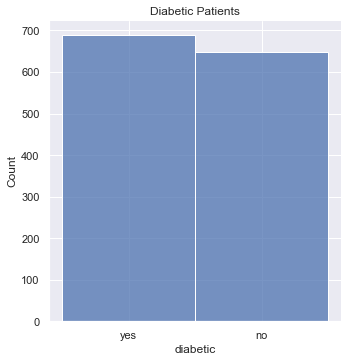

In [24]:
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['diabetic'])
plt.title("Diabetic Patients")
plt.show()

In [25]:
insurance_dataset['diabetic'].value_counts()

yes    689
no     649
Name: diabetic, dtype: int64

<Figure size 432x432 with 0 Axes>

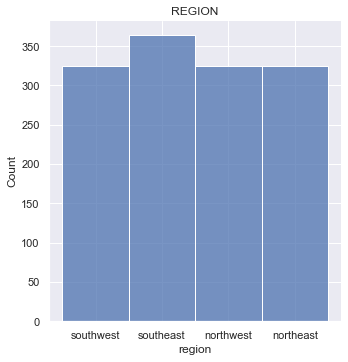

In [26]:
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['region'])
plt.title("REGION")
plt.show()

In [27]:
insurance_dataset['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

<Figure size 432x432 with 0 Axes>

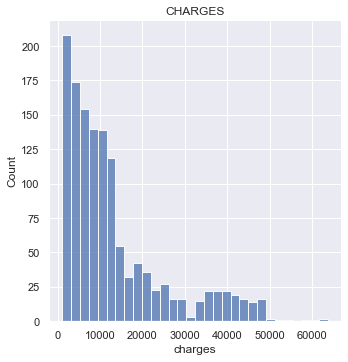

In [28]:
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title("CHARGES")
plt.show()

DATA PRE-PROCESSING

In [29]:
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

insurance_dataset.replace({'alcoholic':{'yes':0,'no':1}},inplace=True)
insurance_dataset.replace({'diabetic':{'yes':0,'no':1}},inplace=True)
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [30]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,alcoholic,diabetic,region,charges
0,19,1,27.900,0,0,1,0,1,16884.92400
1,18,0,33.770,1,1,0,0,0,1725.55230
2,28,0,33.000,3,1,0,0,0,4449.46200
3,33,0,22.705,0,1,1,1,3,21984.47061
4,32,0,28.880,0,1,1,1,3,3866.85520


In [31]:
X=insurance_dataset.drop(columns='charges',axis=1)
Y=insurance_dataset['charges']

In [32]:
X


,age,sex,bmi,children,smoker,alcoholic,diabetic,region
0,19,1,27.900,0,0,1,0,1
1,18,0,33.770,1,1,0,0,0
2,28,0,33.000,3,1,0,0,0
3,33,0,22.705,0,1,1,1,3
4,32,0,28.880,0,1,1,1,3
...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,1,1,3
1334,18,1,31.920,0,1,0,1,2
1335,18,1,36.850,0,1,0,0,0
1336,21,1,25.800,0,1,1,0,1


In [33]:
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [35]:
regressor=LinearRegression()

In [36]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [37]:
train_predict=regressor.predict(X_train)

In [38]:
r_train=metrics.r2_score(Y_train,train_predict)

In [39]:
r_train

0.7519989055929484

In [40]:
test_predict=regressor.predict(X_test)

In [41]:
#r_test=metrics.r2_score(Y_test,test_predict)
from sklearn.metrics import mean_squared_error
r_test=mean_squared_error(Y_test,test_predict)

In [42]:
r_test

38335420.36226412

BUILDING A PREDICTIVE SYSTEM

In [43]:
input_data=(19,0,27.9,0,0,0,0,1)

input_data_np_array=np.asarray(input_data)

input_data_rehsaped=input_data_np_array.reshape(1,-1)

print(regressor.predict(input_data_rehsaped))

[25622.41417841]


In [44]:
metrics.r2_score(Y_test,test_predict)

0.7447381415028473

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
model2=DecisionTreeRegressor()

In [47]:
model2.fit(X_train,Y_train)

DecisionTreeRegressor()

In [48]:
y2_prdt=model2.predict(X_test)

In [49]:
print(mean_squared_error(Y_test,y2_prdt))

48759455.341141544


In [50]:
metrics.r2_score(Y_test,y2_prdt)

0.6753282193837508

In [51]:
input_data=(19,0,27.9,0,0,0,0,1)

input_data_np_array=np.asarray(input_data)

input_data_rehsaped=input_data_np_array.reshape(1,-1)

print(model2.predict(input_data_rehsaped))

[16884.924]


In [52]:
from sklearn.ensemble import GradientBoostingRegressor


In [53]:
model3 = GradientBoostingRegressor()


In [54]:
model3.fit(X_train,Y_train)

GradientBoostingRegressor()

In [55]:
#y3_prdt=model3.predict(Y_test)

In [56]:
input_data=(19,0,27.9,0,0,0,0,1)

input_data_np_array=np.asarray(input_data)

input_data_rehsaped=input_data_np_array.reshape(1,-1)

print(model3.predict(input_data_rehsaped))

[17577.61006268]


In [57]:
y3_prdt=model3.predict(X_test)

In [58]:
metrics.r2_score(Y_test,y3_prdt)

0.8686807411989832

In [59]:
print(mean_squared_error(Y_test,y3_prdt))

19721626.323010124


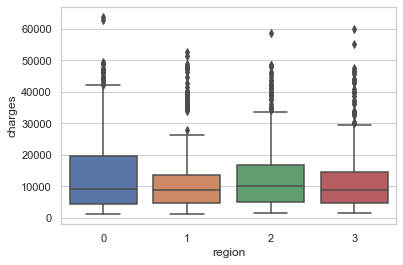

In [60]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=insurance_dataset['region'],y=insurance_dataset['charges'])

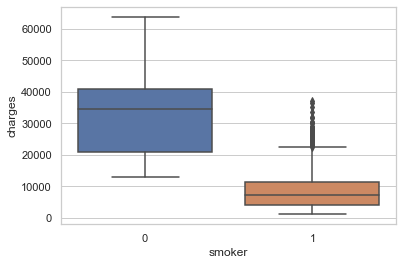

In [61]:
ax = sns.boxplot(x=insurance_dataset['smoker'],y=insurance_dataset['charges'])

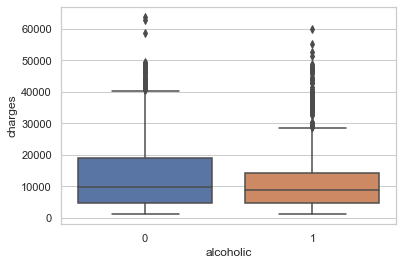

In [62]:
ax = sns.boxplot(x=insurance_dataset['alcoholic'],y=insurance_dataset['charges'])

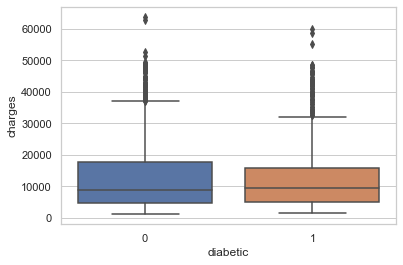

In [63]:
ax = sns.boxplot(x=insurance_dataset['diabetic'],y=insurance_dataset['charges'])

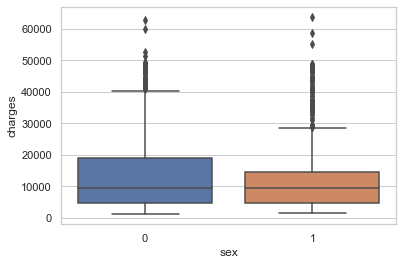

In [64]:
ax = sns.boxplot(x=insurance_dataset['sex'],y=insurance_dataset['charges'])

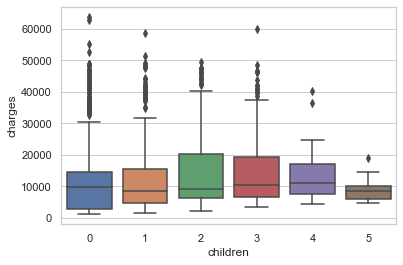

In [65]:
ax = sns.boxplot(x=insurance_dataset['children'],y=insurance_dataset['charges'])